In [73]:
from typing import List
from IPython.display import Image

## 感谢机械工业出版社送书

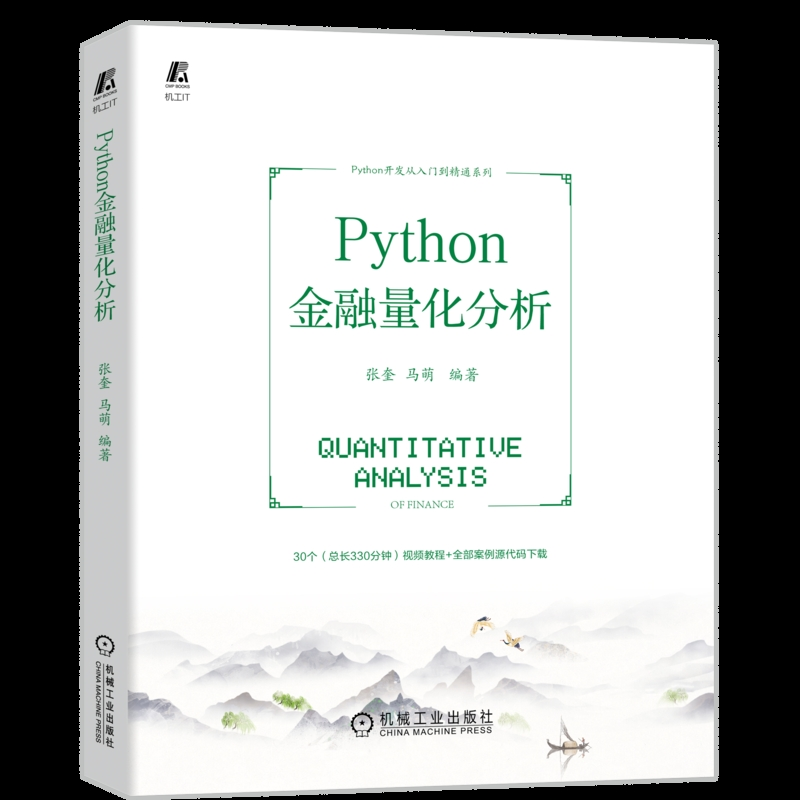

In [77]:
Image('../../imgs/book0.jpeg', width=400)

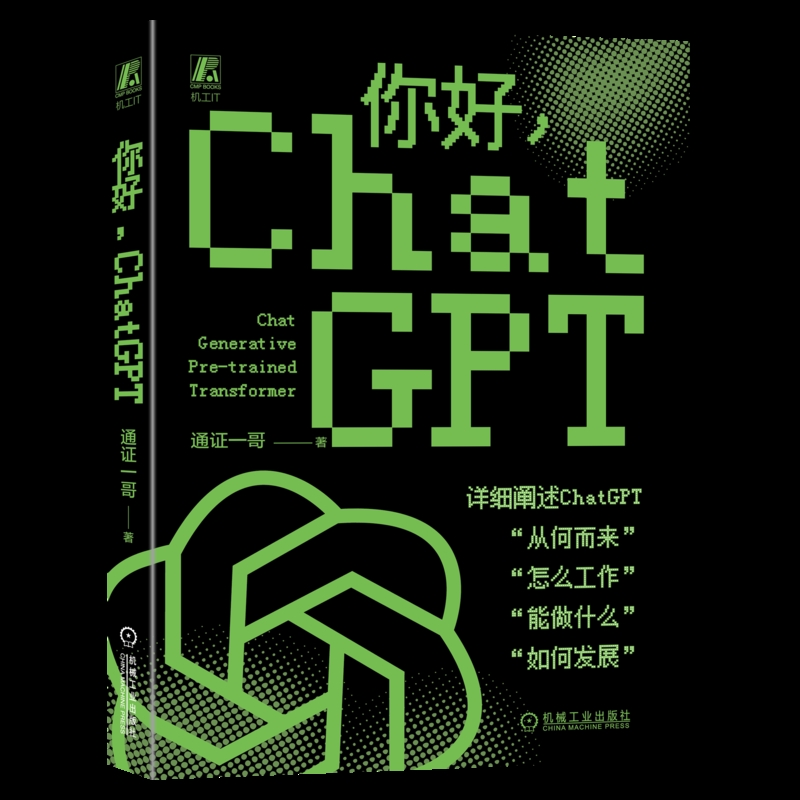

In [78]:
Image('../../imgs/book1.jpeg', width=400)

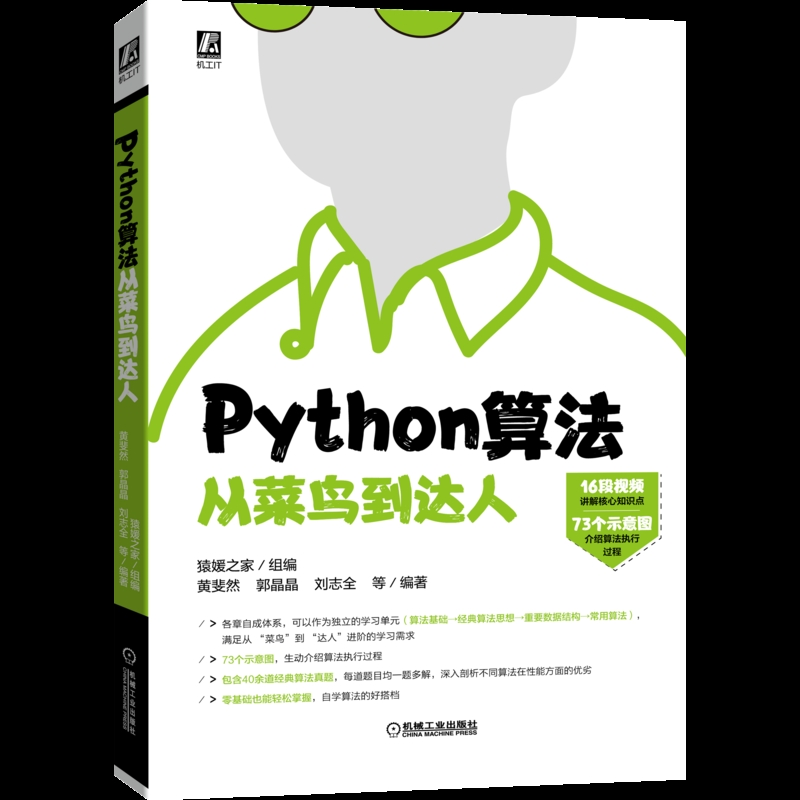

In [80]:
Image('../../imgs/book2.jpeg', width=400)

## basics

- 核心是图中是否存在环 (该 Graph 是否为 DAG，有向无环图）
    - 2->1->3->2
        - `->`: 
            - 实际应用中可以表示依赖关系
            - 也可以表示偏序关系
                - 2>1
                - 1>3
                - 3>2
- https://leetcode.com/discuss/general-discussion/1078072/introduction-to-topological-sort

## 207. Course Schedule

https://leetcode.com/problems/course-schedule/

In [24]:
from collections import defaultdict, deque

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        
        # 入度表
        indegree = [0] * numCourses
        # 邻接列表
        graph = defaultdict(list)
        
        for j, i in prerequisites:
            # i 依赖 j
            graph[i].append(j)
            # j 的入度
            indegree[j] += 1    
        print(graph)
        
        # 入度为0的点，会随着后续，点边的删除，不断变化
        queue = deque([node for node in range(numCourses) if indegree[node] == 0])
        print(queue)
        
        done = []
        while queue:
            node = queue.popleft()
            done.append(node)
            for next in graph[node]:
                indegree[next] -= 1
                if indegree[next] == 0:
                    queue.append(next)
        print(done)
        return len(done) == numCourses or numCourses == 0


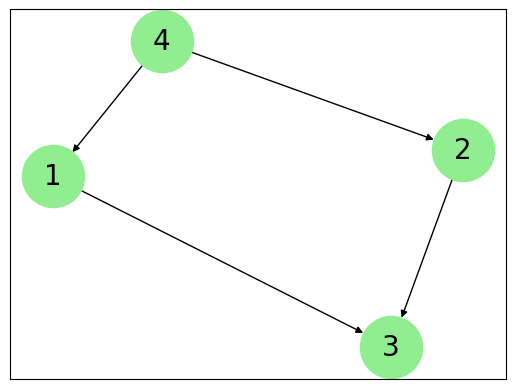

In [86]:
import networkx as nx
G = nx.DiGraph({4: [1, 2], 1:[3], 2:[3]})
nx.draw_networkx(G, with_labels=True, 
                 font_size=20, 
                 node_size=2000, 
                 node_color='lightgreen')

In [87]:
sln = Solution()
sln.canFinish(5, [[1,4],[2,4],[3,1],[3,2]])

defaultdict(<class 'list'>, {4: [1, 2], 1: [3], 2: [3]})
deque([0, 4])
[0, 4, 1, 2, 3]


True

In [90]:
sln = Solution()
sln.canFinish(3, [[0, 1], [1, 2], [2, 0]])

defaultdict(<class 'list'>, {1: [0], 2: [1], 0: [2]})
deque([])
[]


False

### 有环的一种情况

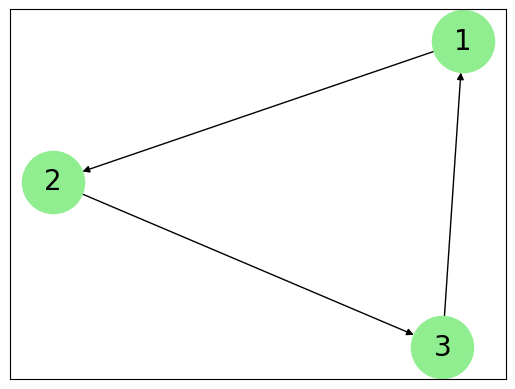

In [88]:
import networkx as nx
G = nx.DiGraph({1: [2], 2: [3], 3:[1]})
nx.draw_networkx(G, with_labels=True, 
                 font_size=20, 
                 node_size=2000, 
                 node_color='lightgreen')

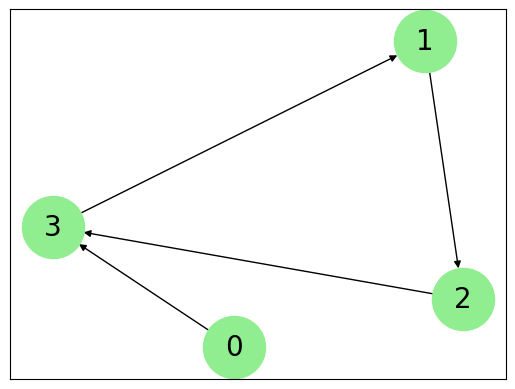

In [27]:
import networkx as nx
G = nx.DiGraph({1: [2], 2: [3], 3:[1], 0:[3]})
nx.draw_networkx(G, with_labels=True, 
                 font_size=20, 
                 node_size=2000, 
                 node_color='lightgreen')

## preferences

- RLHF

In [91]:
from collections import defaultdict, deque

def merge_relations(relations):
    graph = defaultdict(list)
    indegree = defaultdict(int)

    # 创建图和入度表
    for relation in relations:
        a, b = relation.split(">")
        graph[a].append(b)
        indegree[b] += 1

    # 找出入度为0的节点
    queue = deque([node for node in graph if indegree[node] == 0])

    result = []
    while queue:
        node = queue.popleft()
        result.append(node)

        for neighbor in graph[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)

    if len(result) != len(graph):
        # 存在环
        return None

    return ">".join(result)

In [92]:
merge_relations(['a>b', 'b>c', 'c>a'])

In [93]:
merge_relations(['a>b', 'a>c', 'b>c'])

'a>b>c'

In [94]:
merge_relations(['a>b', 'a>c', 'b>c', 'a>d'])

'a>b>d>c'